In [1]:
import numpy as np

from app.recognize.classifiers import Classifiers
from app.tools import dataset

ds = dataset.get_dataset('./data/aligned', min_img_count=4)

In [2]:
clf = Classifiers(aug_noise=0, aug_flip=False)
clf._load_model()

In [3]:
all_embs = []
all_classes = []

for i in range(len(ds)):
    classes = [i] * len(ds[i].image_paths)
    imgs = clf.load_data(ds[i].image_paths, classes)
    embs = clf._predict(imgs)
    all_classes.extend(classes)
    all_embs.extend(embs)
    
all_embs = np.array(all_embs)
all_classes = np.array(all_classes)

 ... 5 images
 ... 4 images
 ... 5 images
 ... 8 images
 ... 5 images
 ... 4 images
 ... 4 images
 ... 4 images
 ... 5 images
 ... 5 images
 ... 5 images
 ... 4 images
 ... 5 images
 ... 5 images
 ... 4 images
 ... 4 images
 ... 5 images
 ... 4 images
 ... 5 images
 ... 5 images
 ... 5 images
 ... 4 images
 ... 6 images
 ... 5 images
 ... 5 images
 ... 4 images
 ... 4 images
 ... 4 images
 ... 6 images
 ... 4 images
 ... 5 images
 ... 4 images
 ... 5 images
 ... 6 images
 ... 8 images
 ... 6 images
 ... 4 images
 ... 4 images
 ... 6 images
 ... 6 images
 ... 7 images


In [4]:
from scipy.spatial.distance import cdist

distances = cdist(all_embs, all_embs)
max_distance = np.amax(distances)
max_distance

1.5909624331598995

In [5]:
thresholds = []
precisions = []
recalls = []

for t in range(100):
    threshold = max_distance * (t + 1) / 100
    class_precisions = []
    class_recalls = []
    for cl in np.unique(all_classes):
        current_class_embs = all_embs[all_classes == cl]
        alien_classes = all_classes != cl
        distances_own = cdist(current_class_embs, current_class_embs)
        distances_own_count = distances_own.shape[0] ** 2 - distances_own.shape[0]
        distances_alien = cdist(current_class_embs, all_embs[all_classes != cl])
        distances_alien_count = distances_alien.shape[0] * distances_alien.shape[1]
        own_distances_in_threshold = len(distances_own[distances_own <= threshold]) - len(current_class_embs)
        alien_distances_in_threshold = len(distances_alien[distances_alien <= threshold])
        alien_distances_out_threshold = len(distances_alien[distances_alien > threshold])
        if own_distances_in_threshold > 0:
            precision = own_distances_in_threshold / (own_distances_in_threshold + alien_distances_in_threshold)
        else:
            precision = 0
        recall = own_distances_in_threshold / distances_own_count
        class_precisions.append(precision)
        class_recalls.append(recall)
    thresholds.append(threshold)
    precisions.append(precision)
    recalls.append(recall)

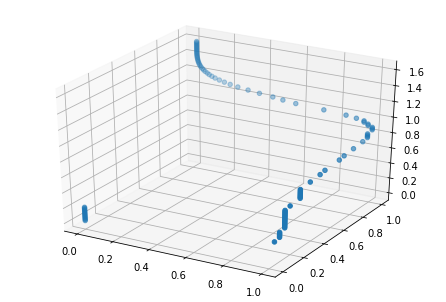

In [7]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(precisions, recalls, thresholds)
pyplot.show()


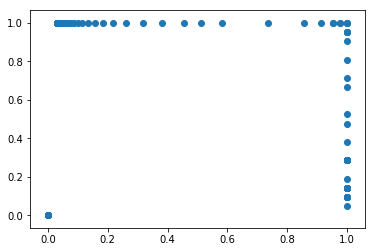

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(precisions, recalls)
plt.show()